In [1]:
import numba
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
# Metrics

In [68]:
# Building Symmetry function


def sym_test(freqs, amps):
    """Symmetry scoring function
    freqs: frequency array of S21 data
    amps: Amplitude array of S21 data (absolutes)

    returns sym_score between 0,1
    """

    centre = np.argmin(amps) 
    #print(centre)

    asym = 0
    #print(len(freqs))
    #print(range(len(freqs) - centre))
    for i in range(len(freqs) - centre):
        asym = amps[centre + i] - amps[centre - i]
        asym += asym
    
    sym_score = 1/(1 - asym)
    return np.abs(sym_score)

def sym_test1(freqs, amps):
    """Symmetry scoring function
    freqs: frequency array of S21 data
    amps: Amplitude array of S21 data (absolutes)

    returns sym_score between 0,1
    """

    def remove_side(arr, s):
        if s < 0:
            return arr[-s:]
        elif s > 0:
            return arr[:-s]
        else:
            return arr

    def masky(c):
        r = st.norm(scale=1e-11, loc=freqs[2*c-1]) 
        mask = r.pdf(freqs)
        plt.plot(mask)
        return mask
    
    centre = np.argmin(amps) 
    difference = 2*centre + 1

    new_arr = (amps - abs(np.roll(np.flip(amps), difference)))
    #plt.plot(new_arr)
    #plt.show()

    new_arr = new_arr*masky(centre)
    #plt.plot(masky(centre))
    #plt.show()
    #plt.plot(new_arr)
    #plt.show()
    
    #asym = remove_side(new_arr, len(amps) - difference)
    asym = new_arr
    
    if len(asym) < 2: 
        print('disproportionate')
        return
    print(len(amps) - difference)
    
    sym_score = 1/(1 - asym.sum())
    return sym_score

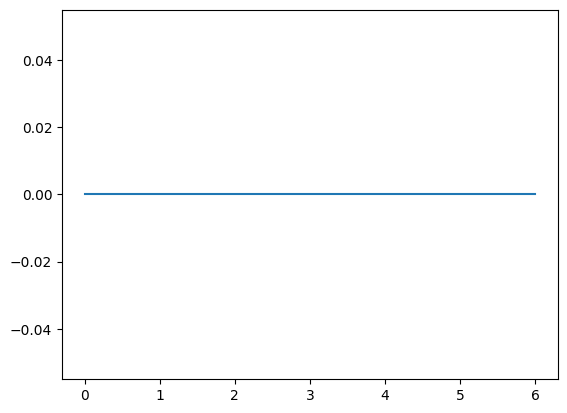

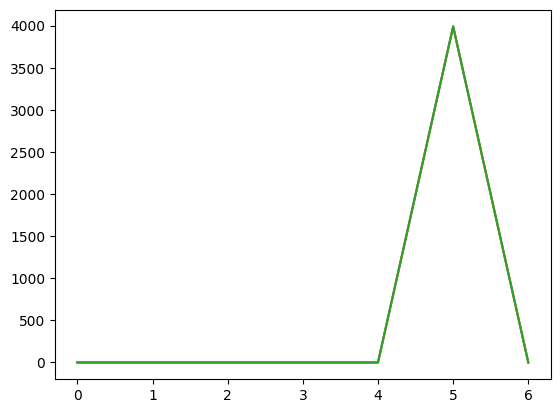

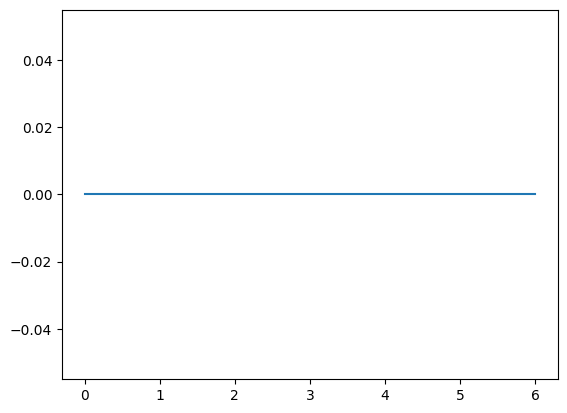

0
test 1.0 1
test 1.0 1
test 1.0 1
test 0.09090909090909091 0ish
test 1.0 1


In [50]:
f1 = [0,1,2,3,4,5,6]
a1 = [2,2,1,0,1,2,2]

print('test', sym_test1(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [2,2,1,0,1,2,2,2]

print('test', sym_test(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [2,2,2,2,2,2,2,2]

print('test', sym_test(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [0,1,2,3,4,5,6,7]

print('test', sym_test(f1, a1), "0ish") #not 1 somewhere near 0?

f1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
a1 = [2,2,1,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

print('test', sym_test(f1, a1), 1) #1

In [5]:
p = np.array([2,2,1,0,1,2,2,2])
np.flip(p)

array([2, 2, 2, 1, 0, 1, 2, 2])

In [6]:
np.abs((p - np.flip(p))).sum()

4

In [7]:
np.flip([0,1,2,3,4,5,6,7])

array([7, 6, 5, 4, 3, 2, 1, 0])

In [8]:
np.roll(np.array([7, 6, 5, 4, 3, 2, 1, 0]), -3)

array([4, 3, 2, 1, 0, 7, 6, 5])

In [9]:
#[0,1,2,3,4,5,6] -> [4,3,2,1,0]

In [24]:
test = np.array([2,2,1,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2])

centre = np.argmin(test) 
print(centre)

asym = np.abs((test - np.flip(test))).sum()
asym

3


8

array([3.98942280e-01, 2.41970725e-01, 5.39909665e-02, 4.43184841e-03,
       1.33830226e-04, 1.48671951e-06, 6.07588285e-09, 9.13472041e-12])

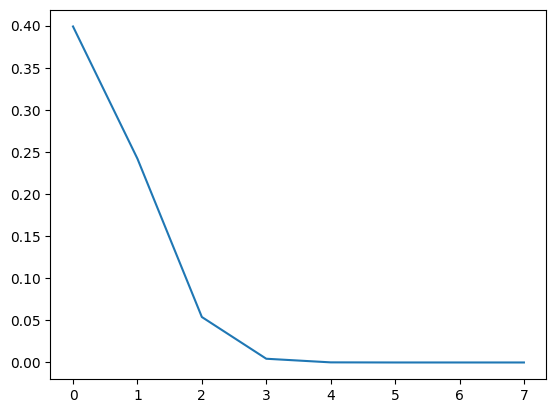

In [27]:
def masky(c):
    r = st.norm(scale=1, loc=0) 
    mask = r.pdf([0,1,2,3,4,5,6,7])
    plt.plot(mask)
    return mask

masky(0)

In [12]:
t1 = np.array([2,2,1,0,1,2,2,3,3])
np.argmin(t1)

3

In [13]:
t2 = np.flip(t1)
t2

array([3, 3, 2, 2, 1, 0, 1, 2, 2])

In [14]:
t3 = np.roll(t2, 7)
t3

array([2, 2, 1, 0, 1, 2, 2, 3, 3])

In [15]:
len(t3)

9

In [ ]:
[

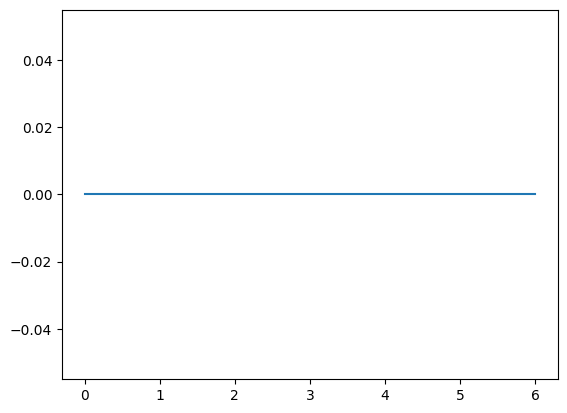

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

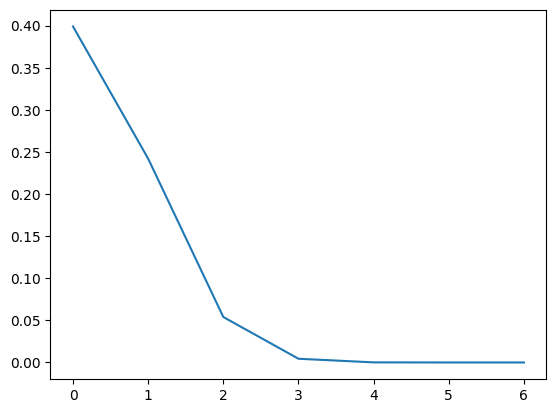

In [17]:
f1 = [0,1,2,3,4,5,6]
a1 = [2,2,1,0,1,2,2]

print('test', sym_test1(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [2,2,1,0,1,2,2,2]

print('test', sym_test1(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [2,2,2,2,2,2,2,2]

print('test', sym_test1(f1, a1), 1) #1

f1 = [0,1,2,3,4,5,6,7]
a1 = [0,1,2,3,4,5,6,7]

print('test', sym_test1(f1, a1), "0ish") #not 1 somewhere near 0?

f1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
a1 = [2,2,1,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

print('test', sym_test1(f1, a1), 1) #1

In [ ]:
f1 = np.linspace(0,100,100)
a1 = (f1-50)**6


sym_test1(f1, a1)

In [35]:
# Current KID model

def add_gaussian_noise(data, std_dev, mean=0):
    noise = np.random.normal(mean, std_dev, size=data.shape)
    noisy_data = data + noise
    return noisy_data
    

@numba.jit(nopython=True)
def cubic_root(x):
    """Compute cubic root of a number while maintaining its sign.
    
    x: (complex) The number.
    """
    
    third = 1./3.
    
    if x.real >= 0:
        return x**third
    else:
        return -(-x)**third
    
    
@numba.jit(nopython=True)
def cubicRealRoot(a, b, c):
    """Analytical closed-form solver for a single cubic equation.
    x^3 + a*x^2 + bx + c = 0
    Gives only one real root.
    
    a, b, c: (float) Cubic coeficients.
    """
    
    third = 1./3.
    a13 = a*third
    a2 = a13*a13
    f = third*b - a2
    g = a13 * (2*a2 - b) + c
    h = 0.25*g*g + f*f*f

    if f == g == h == 0:
        return -cubic_root(c)

    elif h.real <= 0:
        j = np.sqrt(-f)
        k = np.arccos(-0.5*g / (j*j*j))
        m = np.cos(third*k)
        return 2*j*m - a13

    else:
        sqrt_h = cmath.sqrt(h)
        S = cubic_root(-0.5*g + sqrt_h)
        U = cubic_root(-0.5*g - sqrt_h)
        S_plus_U = S + U
        return S_plus_U - a13
    
    
def xSolver(fi, Pi, f0, Es, Qr, Qc):
    """Solve for x, the detuning.
    
    fi: Frequency of bin.
    Pi: Input power in bin.
    f0, Es, Qr, Qc: See modelKid() decription.
    """
    
    from numpy.polynomial import polynomial
    
    x0 = (fi - f0)/f0
    a = 2*Qr**3*Pi/Qc/f0/Es
    # c3 = 1
    c2 = -x0
    c1 = 1/(4*Qr**2)
    c0 = -1/(4*Qr**2)*(a/Qr + x0)

    sol = cubicRealRoot(c2, c1, c0)
    
    return sol

def modelKid(f, P, f0, Es, Qr, Qc, yi, A):
    """Simple KID model.
    
    f:  Frequency in all bins, array.
    P:  Input power in all bins, array.
    f0: Resonance frequency of KID.
    Es: Scaling energy constant of KID.
    Qr: Overall loaded quality factor of KID.
    Qc: Coupling quality factor of KID.
    yi: Continuum asymmetry.
    A:  Amplitude scaling constant.
    """
    
    x = np.array([
        xSolver(f[i], P[i], f0, Es, Qr, Qc) 
        for i in range(len(f))
    ])
    
    yr = np.sqrt(1 - yi**2)
    y = (1 + yi*1j)
    
    # changing Qr based on power
    Qr =  (1 - 0.25*(1 -(0.1/P[1]))) * Qr
    
    S21 = 1 - A*(Qr/Qc)*y/(1+2j*Qr*x)
    
    
    
    #S21[S21<0] = 0
    
    return S21

13


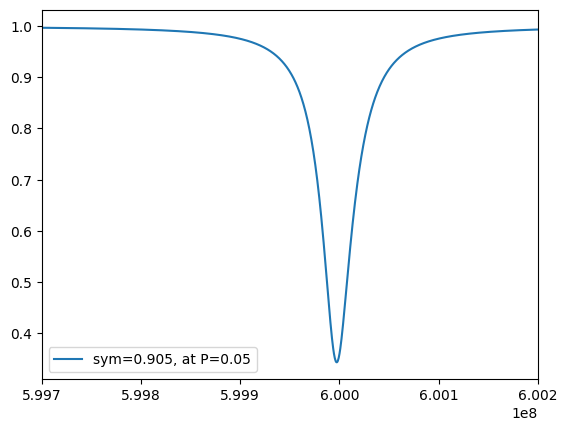

13
symmetry: 0.9045516657075788


In [77]:
power = 0.05

#tone comb
freqs = np.linspace(5e8, 7e8, 500000)
pows = np.ones_like(freqs)*power #0.05

#KID
S21 = np.abs(modelKid(f=freqs, P=pows, f0=600e6, Es=0.1, Qr=10000, Qc=38000, yi=0, A=2))


plt.plot(freqs, np.abs(S21), label=f'sym={sym_test1(freqs, np.abs(S21)):.3}, at P={pows[0]}')
plt.xlim(5.997e8, 6.002e8)
plt.legend()
plt.show()

print("symmetry:", sym_test1(freqs, np.abs(S21)))

In [ ]:
r = st.norm(scale=1, loc=25)
plt.plot(np.linspace(-100,100,1000), r.pdf(np.linspace(-10,1000,1000)))

In [ ]:
np.linspace(1,10,10)

In [71]:
def sym_test1(freqs, amps):
    """Symmetry scoring function
    freqs: frequency array of S21 data
    amps: Amplitude array of S21 data (absolutes)

    returns sym_score between 0,1
    """

    def remove_side(arr, s):
        if s < 0:
            return arr[-s:]
        elif s > 0:
            return arr[:-s]
        else:
            return arr

    def masky(c):
        r = st.norm(scale=1e-11, loc=freqs[2*c-1]) 
        mask = r.pdf(freqs)
        return mask
    
    centre = np.argmin(amps) 
    difference = 2*centre + 1

    new_arr = (amps - abs(np.roll(np.flip(amps), difference)))

    new_arr = new_arr*masky(centre)
    
    asym = remove_side(new_arr, len(amps) - difference)
    
    if len(asym) < 2: 
        print('disproportionate')
        return
    print(len(amps) - difference)
    
    sym_score = 1/(1 - asym.sum())
    return sym_score